<a href="https://colab.research.google.com/github/saimumadil24/StockPricePredictionLSTM/blob/main/Stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
#importing google stock data througj tiingo
key='44403c14b183dbbe3a4c7dd7c66d61ee6b679330'
data=pdr.get_data_tiingo('MSFT',api_key=key)

In [8]:
#storing data in a csv file
data.to_csv('MSFT.csv')

In [9]:
#importing csv file
df=pd.read_csv('/content/MSFT.csv',parse_dates=True)
df['date']=pd.to_datetime(df['date'])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2019-03-12 00:00:00+00:00,113.62,113.99,112.65,112.82,26132717,108.137132,108.489277,107.213940,107.375737,26132717,0.0,1.0
1,MSFT,2019-03-13 00:00:00+00:00,114.50,115.00,113.78,114.13,35513771,108.974667,109.450538,108.289411,108.622521,35513771,0.0,1.0
2,MSFT,2019-03-14 00:00:00+00:00,114.59,115.20,114.33,114.54,30763367,109.060323,109.640887,108.812870,109.012736,30763367,0.0,1.0
3,MSFT,2019-03-15 00:00:00+00:00,115.91,117.25,114.59,115.34,54630661,110.316625,111.591962,109.060323,109.774131,54630661,0.0,1.0
4,MSFT,2019-03-18 00:00:00+00:00,117.57,117.61,116.05,116.17,31207596,111.896520,111.934590,110.449869,110.564079,31207596,0.0,1.0


In [10]:
#checking shape
df.shape

(1258, 14)

In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,MSFT,2024-03-04 00:00:00+00:00,414.92,417.35,412.32,413.44,17595956,414.92,417.35,412.32,413.44,17595956,0.0,1.0
1254,MSFT,2024-03-05 00:00:00+00:00,402.65,414.25,400.64,413.96,26919177,402.65,414.25,400.64,413.96,26919177,0.0,1.0
1255,MSFT,2024-03-06 00:00:00+00:00,402.09,405.16,398.39,402.97,22344149,402.09,405.16,398.39,402.97,22344149,0.0,1.0
1256,MSFT,2024-03-07 00:00:00+00:00,409.14,409.78,402.24,406.12,18718479,409.14,409.78,402.24,406.12,18718479,0.0,1.0
1257,MSFT,2024-03-08 00:00:00+00:00,406.22,410.42,404.33,407.96,18002186,406.22,410.42,404.33,407.96,18002186,0.0,1.0


In [12]:
#creating dataset of close column
df1=df.sort_values(by='date')['close']
df1

0       113.62
1       114.50
2       114.59
3       115.91
4       117.57
         ...  
1253    414.92
1254    402.65
1255    402.09
1256    409.14
1257    406.22
Name: close, Length: 1258, dtype: float64

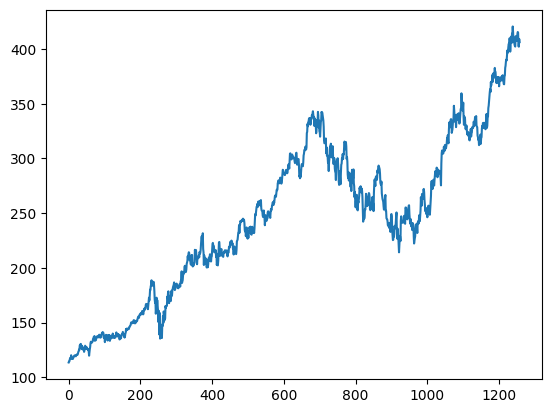

In [13]:
#ploting the close price of Microsoft
plt.plot(df1)
plt.show()

In [14]:
#LSTM are very sensitive to scale. Thus we scale it using MinMax scaler
minmax=MinMaxScaler(feature_range=(0,1))
df2=minmax.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
#taking length for splitting data
train_length=int((df2.shape[0])*.67)
test_length=(df2.shape[0])-train_length

In [16]:
#splitting data into train and test
train,test=df2[0:train_length,:],df2[train_length:df2.shape[0],:]

In [17]:
test

array([[0.45762878],
       [0.46623009],
       [0.45818265],
       [0.47538527],
       [0.48431238],
       [0.49268563],
       [0.47808947],
       [0.47310462],
       [0.45052618],
       [0.50539211],
       [0.53038152],
       [0.54448897],
       [0.53559444],
       [0.52520119],
       [0.55012544],
       [0.55396996],
       [0.55155899],
       [0.54312058],
       [0.54957156],
       [0.57192194],
       [0.56494966],
       [0.58088163],
       [0.58596423],
       [0.58348809],
       [0.57895937],
       [0.57521259],
       [0.56211514],
       [0.53474734],
       [0.53047926],
       [0.52836152],
       [0.53833122],
       [0.50327436],
       [0.49395628],
       [0.48659303],
       [0.48170593],
       [0.47821979],
       [0.46407976],
       [0.45492458],
       [0.47069364],
       [0.47209461],
       [0.49144756],
       [0.49858274],
       [0.45081941],
       [0.45156876],
       [0.42928355],
       [0.42719838],
       [0.42648161],
       [0.419

In [18]:
#Creating dataset through funciton
def dataset_creation(dataset,timestep=1):
  x_data,y_data=[],[]
  for i in range(len(dataset)-timestep-1):
    a=dataset[i:(i+timestep),0]
    x_data.append(a)
    y_data.append(dataset[i+timestep,0])
  return np.array(x_data),np.array(y_data)

In [19]:
#taking train and test dataset
timestep=100
xtrain,ytrain=dataset_creation(train,timestep)
xtest,ytest=dataset_creation(test,timestep)

In [20]:
print(f"xtrain= {xtrain.shape}, ytrain= {ytrain.shape}, xtest= {xtest.shape}, ytest= {ytest.shape}")

xtrain= (741, 100), ytrain= (741,), xtest= (315, 100), ytest= (315,)


In [21]:
#reshape input data for LSTM model
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [22]:
#importing libraries for creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
#Creating model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 297ms/step - loss: 0.0565 - val_loss: 0.0399
Epoch 2/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0096 - val_loss: 0.0030
Epoch 3/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0041 - val_loss: 0.0146
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 8/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0012 - val_lo

In [26]:
#creating prediction
train_pred=model.predict(xtrain)
test_pred=model.predict(xtest)

10/10 [==============================] - 0s 35ms/step


In [27]:
#reversing the scaled value
train_pred=minmax.inverse_transform(train_pred)
test_pred=minmax.inverse_transform(test_pred)

In [28]:
#reshaping the ytrain and ytest
ytrain1=ytrain.reshape(-1,1)
ytest1=ytest.reshape(-1,1)

In [29]:
#inverse to the main value of ytrain and ytest
ytrain1=minmax.inverse_transform(ytrain1)
ytest1=minmax.inverse_transform(ytest1)

In [30]:
#importing more libraries
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [31]:
#Finding rmse for train and test
train_rmse=np.sqrt(mean_squared_error(ytrain1,train_pred))
test_rmse=np.sqrt(mean_squared_error(ytest1,test_pred))
print(f"train rmse= {train_rmse}, test rmse= {test_rmse}")

train rmse= 6.009571547870166, test rmse= 6.342374683714734


In [32]:
print(ytrain1.shape),print(train_pred.shape)

(741, 1)
(741, 1)


(None, None)

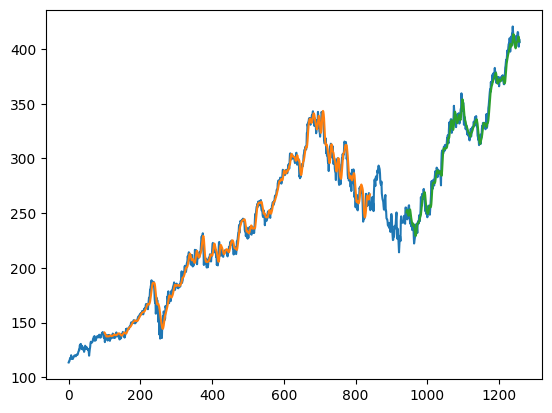

In [33]:
#plotting
#plotting for trainprediction
look_back=100
train_pred_plot=np.empty_like(df2)
train_pred_plot[:,:]=np.nan
train_pred_plot[look_back:look_back+len(train_pred),:]=train_pred
#plotting for testprediction
test_pred_plot=np.empty_like(df2)
test_pred_plot[:,:]=np.nan
test_pred_plot[(look_back*2)+len(train_pred)+1:len(df2)-1,:]=test_pred
#plotting the baseline and predictoins
plt.plot(minmax.inverse_transform(df2))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.show()

In [34]:
train_pred

array([[140.9272 ],
       [140.54799],
       [139.75179],
       [138.81152],
       [137.94048],
       [137.46384],
       [137.33202],
       [137.33632],
       [137.55164],
       [137.64362],
       [137.52692],
       [137.38446],
       [137.4233 ],
       [137.58658],
       [137.91168],
       [138.28186],
       [138.35638],
       [138.23468],
       [138.01723],
       [137.76341],
       [137.67451],
       [137.7552 ],
       [137.8476 ],
       [137.99359],
       [138.32733],
       [138.75809],
       [139.10916],
       [139.23566],
       [139.14664],
       [138.9928 ],
       [138.83298],
       [138.6379 ],
       [138.48804],
       [138.4734 ],
       [138.74445],
       [139.15149],
       [139.57217],
       [139.82646],
       [140.01222],
       [140.17195],
       [140.20271],
       [140.19061],
       [140.04799],
       [139.64595],
       [139.14606],
       [138.76602],
       [138.50241],
       [138.25552],
       [138.16696],
       [138.29247],


In [36]:
#length of test data
len(test)

416

In [37]:
#creating input
x_input=test[316:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
#temp input as list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.71358290163881,
 0.7116932199524322,
 0.7053399797999544,
 0.7092822467663635,
 0.694132212556609,
 0.7027661030202326,
 0.7067083699866419,
 0.7397452187795264,
 0.698107060241749,
 0.7043625582380346,
 0.7287980972860262,
 0.7314045547844785,
 0.7573388068940801,
 0.7646694686084774,
 0.7792656305998111,
 0.7914182386863453,
 0.8044505261786075,
 0.8131495780796925,
 0.8049718176782981,
 0.8342293030984265,
 0.8244876681979605,
 0.8361841462222657,
 0.8342293030984265,
 0.8554067702733523,
 0.8348157560355782,
 0.8595445215521453,
 0.845306747466849,
 0.8608803310201023,
 0.8595119408334149,
 0.8633564656436321,
 0.87668197960447,
 0.8641384028931678,
 0.8643338872055517,
 0.8499983709640635,
 0.8325025250057017,
 0.843514807936663,
 0.8313947805688593,
 0.8383996350959502,
 0.8490861108396051,
 0.8395399602515232,
 0.849574821620565,
 0.8495422409018343,
 0.8220441142931614,
 0.8376828592838759,
 0.8439383572801615,
 0.8459257811227314,
 0.8373244713778385,
 0.8468380412471899,
 

In [48]:
#Demonstrating prediction for next 10 days
lst_output=[]
n_steps=100
i=0

while i<30:

  if (len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print('{} day output {}'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.87668198 0.8641384  0.86433389 0.84999837 0.83250253 0.84351481
 0.83139478 0.83839964 0.84908611 0.83953996 0.84957482 0.84954224
 0.82204411 0.83768286 0.84393836 0.84592578 0.83732447 0.84683804
 0.85022644 0.85048708 0.84856482 0.85250709 0.85498322 0.83813899
 0.83725931 0.82859284 0.82797381 0.85058482 0.8541687  0.87691004
 0.88297006 0.89548105 0.90134558 0.89873913 0.91307464 0.92871339
 0.92167595 0.92946274 0.94138729 0.94891343 0.94585085 0.96471508
 0.96103346 0.92516209 0.94536213 0.96960219 0.95145473 0.95093344
 0.97882253 0.97901802 1.         0.9827648  0.95363764 0.96396573
 0.95441957 0.94627439 0.94213664 0.94014922 0.97100316 0.96673509
 0.95761248 0.957417   0.95819894 0.97748672 0.98354674 0.98165706
 0.94168051 0.93985599 0.9628254  0.95331183 0.94531882 0.9426353
 0.94002903 0.93740845 0.93483317 0.93235934 0.93000889 0.92777944
 0.92565703 0.92362511 0.92166805 0.91977298 0.91792846 0.91612577
 0.9143573  0.91261709 0.91090059 0.90920484 0.9075

In [55]:
#counting day for plotting
day_inp=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
#lenght of df2
len(df2)

1258

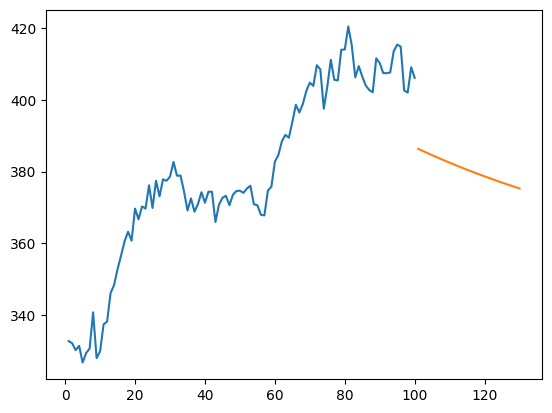

In [56]:
#plotting the prediction
plt.plot(day_inp,minmax.inverse_transform(df2[1158:]))
plt.plot(day_pred,minmax.inverse_transform(lst_output))

In [57]:
df3=df2.tolist()
df3.extend(lst_output)

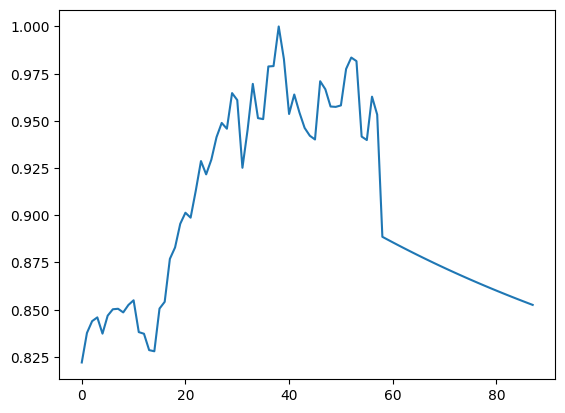

In [58]:
plt.plot(df3[1200:])

In [59]:
#making inverse value and final plot
df3=minmax.inverse_transform(df3)

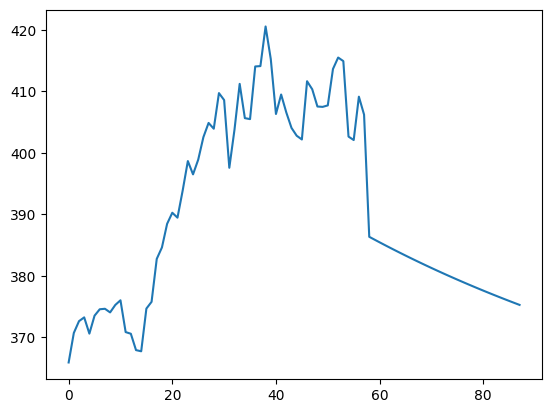

In [60]:
#plotting
plt.plot(df3[1200:])